# Técnica de agrupamiento (Clustering) Jearárquico | IrisPlant
## Enlace Simple
## Enlace Completo
## MAXMIN

En este documento se presentan las técnicas de agrupamiento no supervisado, tambien conocido como "clustering". A continuación se propone el uso de la base de datos Iris Plant.

In [175]:
#sección de importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
#librerias especializadas
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import pdist,squareform
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import linkage,dendrogram
#estandarizar conjunto de datos
from sklearn.preprocessing import StandardScaler

In [201]:
sc = StandardScaler()
iris = pd.read_csv('../datasets/iris_plant/iris_plant.csv')
data = iris.columns.values.tolist()[:-1] #tomamos todos los nombres de las columnas, menos la última
target = iris.columns.values.tolist()[-1]#tomamos el nombre de la ultima columna
X,y = iris[data],iris[target] #separacion del dataset en caracteristicas y clase
X_std = pd.DataFrame(sc.fit_transform(X),columns=data) #caracteristicas estandarizadas
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20,random_state=0) #partición 80-20 retorna DataFrames
X_train_std,X_test_std,y_train_std,y_test_std= train_test_split(X_std,y,test_size=.20,random_state=0) #partición 80-20

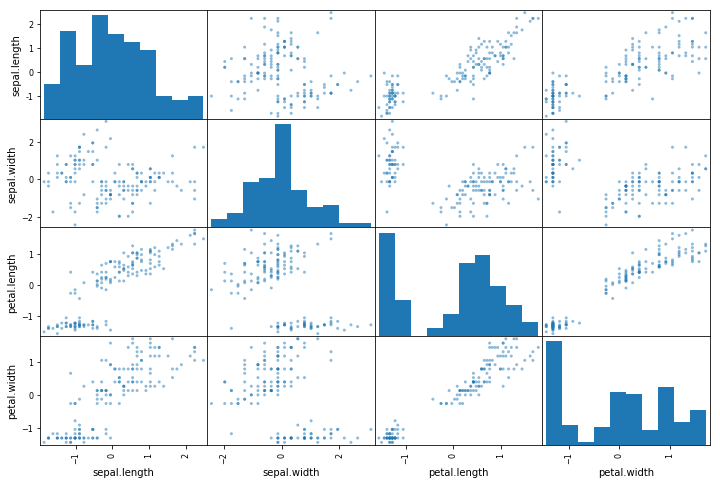

In [199]:
#Tabla que muestra la distribución de las caracteristicas estandarizadas
pd.plotting.scatter_matrix(X_std,figsize=(12,8))
plt.show()

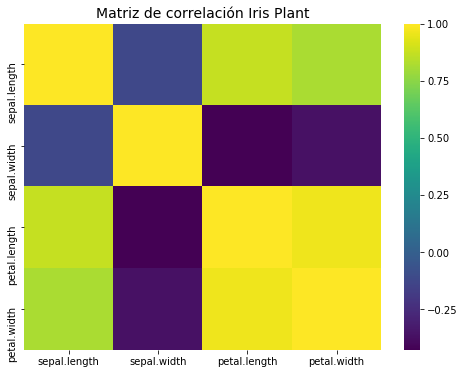

In [198]:
#Matriz de correlación datos STD de Iris Plant, Entre mas obscuro menor correlación
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(111)
ax.set_title('Matriz de correlación Iris Plant', fontdict={'fontsize': 14, 'fontweight': 'medium'})
sbs.heatmap(X_std.corr(),xticklabels=X_std.columns.values,yticklabels=X_std.columns.values,cmap='viridis')
plt.show()

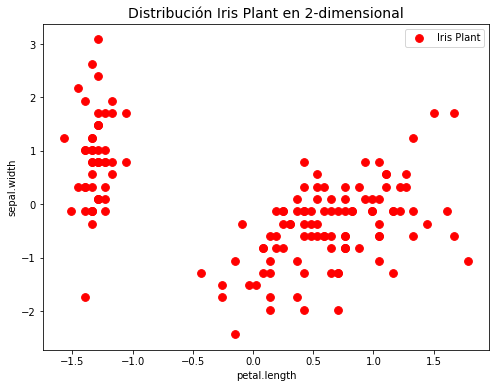

In [196]:
#mostrando distribución de los datos a partir de las caract. menos correlacionadas
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(111)
ax.set_title('Distribución Iris Plant en 2-dimensional', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.scatter(x=X_std['petal.length'],y=X_std['sepal.width'],c='red',s=60,marker='o')
plt.xlabel('petal.length')
plt.ylabel('sepal.width')
plt.legend(["Iris Plant"],loc='best')
plt.show()

# Método de enlace simple

In [253]:
#funcion para guardar las predicciones
def agg_to_csv(data,num_cluster,metrica,enlace,carpeta,nom_arch,ext):
    from sklearn.cluster import AgglomerativeClustering
    cluster = AgglomerativeClustering(n_clusters=num_cluster,affinity=metrica,linkage=enlace)
    c_predict= cluster.fit_predict(data)
    guardar = pd.DataFrame(data)
    guardar['cluster'] = pd.DataFrame(c_predict)
    guardar.to_csv('../datasets/'+carpeta+'/'+str(nom_arch)+str(ext),index=False)

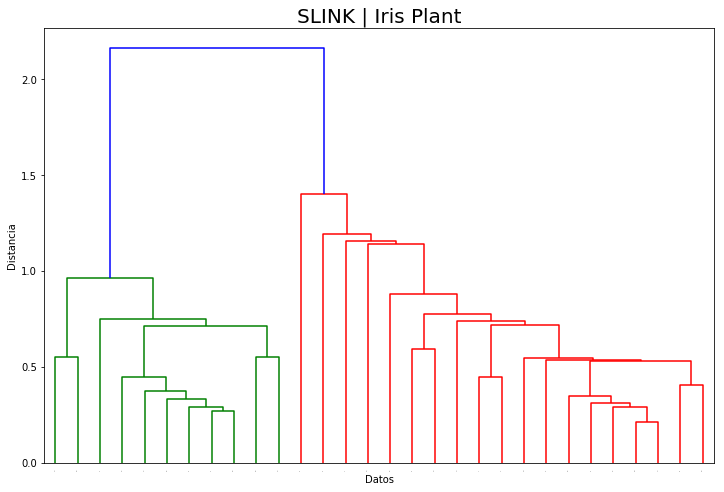

In [254]:
#configuracion del archivo
carpeta_iris = 'iris_plant'
#carpeta_CMC = 'Contraceptive Method Choice'
nombre_archivo = 'SLINK_IP'
extension = '.csv'
#print('../datasets/'+carpeta_CMC+'/'+nombre+extension)
#--------------------------------------------------------------
#The distance function can be cityblock, euclidean, mahalanobis, minkowski...mas en función
#configuracion clustering
metrica = 'euclidean' #metrica de distancia
enlace = 'single'   #otros complete,ward,average
num_cluster = 3
den_title = 'SLINK | Iris Plant' #titulo para el dendograma
xlabel = 'Datos'
ylabel = 'Distancia'
#--------------------------------------------------------------
ma_distancia = pdist(X=X_test_std,metric=metrica) #matriz distancia
dist_ma_comp = pd.DataFrame(squareform(X=ma_distancia,force='no',checks=True)) #Matriz completa
#--------------------------------------------------------------
#Generando enlace simple
slink_std = linkage(X_test_std,method=enlace,metric=metrica)
#--------------------------------------------------------------
#mostrando dendograma formado
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title(den_title, fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xlabel(xlabel)
plt.ylabel(ylabel)
dendrogram(slink_std,leaf_rotation=90.,leaf_font_size=0.8,truncate_mode='lastp',show_contracted=True,show_leaf_counts=True)
plt.show()
#--------------------------------------------------------------
#Generando nuevo DS prediccion cluster
agg_to_csv(data=X_std,num_cluster=num_cluster,
           metrica=metrica,enlace='ward',carpeta=carpeta_iris,nom_arch=nombre_archivo,ext=extension)

In [66]:
X_train = X_train[['sepal.width','petal.length']]
#generando matriz de distancia, usando como metrica la distancia euclidea
dist_ma = pdist(X_train,metric='euclidean')
#forma completa de la matriz
dist_ma_comp = squareform(dist_ma) #esta función solamente es para mostrar la matriz completa
#pd.DataFrame(dist_ma_comp)

In [71]:
#Generando enlace simple
row_cluster = linkage(X_train.values,method='single',metric='euclidean')
row_cluster.shape

(104, 4)

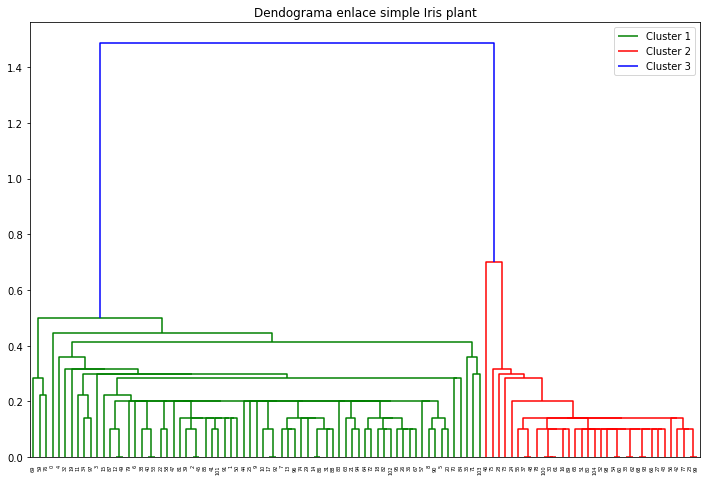

In [86]:
#mostrando dendograma formado
fig_3 = plt.gcf()
fig_3.set_size_inches(12,8)
dendrogram(row_cluster)
plt.title('Dendograma enlace simple Iris plant')
plt.legend(['Cluster 1','Cluster 2','Cluster 3'],loc='best')
plt.show()

In [79]:
slink_ds = pd.DataFrame(row_cluster,columns=['sepal.length','sepal.width','petal.length','petal.width'])

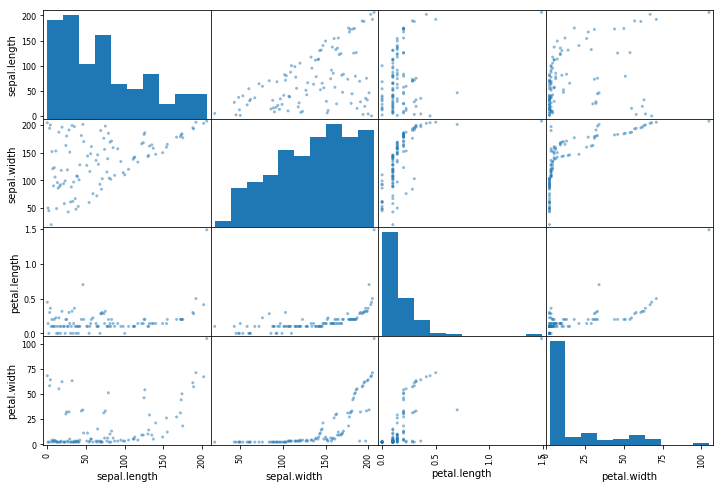

In [84]:
pd.plotting.scatter_matrix(slink_ds,figsize=(12,8))
plt.show()

In [89]:
#guardar el dataset de row_cluster y tratar de identificar a que cluster pertenece
slink_ds.to_csv('../datasets/iris_plant/slink_ds.csv',index=False)

In [90]:
from sklearn.cluster import KMeans

In [104]:
kmean = KMeans(n_clusters=3)
kmean.fit(X_train)
y_means = kmean.predict(X_train)

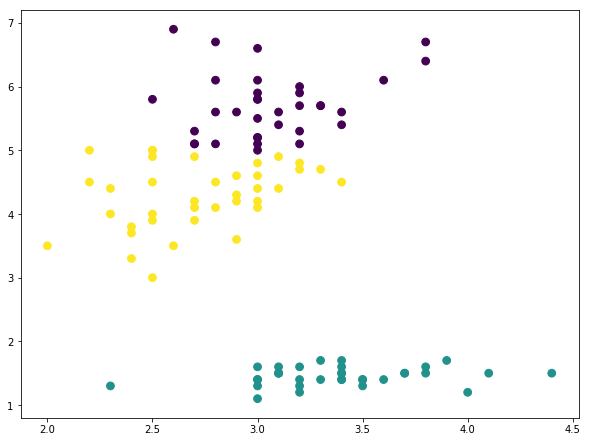

In [105]:
fig_4 = plt.gcf()
fig_4.set_size_inches(10,7.5)
plt.scatter(x=X_train['sepal.width'],y=X_train['petal.length'],c=y_means,s=60,cmap='viridis')
plt.title('')
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

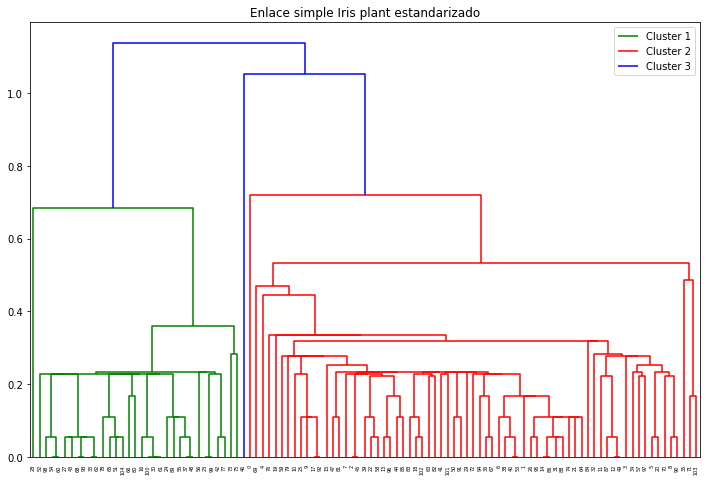

In [111]:
X_train_std = sc.fit_transform(X_train)
clink_std = linkage(X_train_std,method='single',metric='euclidean')
fig_5 = plt.gcf()
fig_5.set_size_inches(12,8)
dendrogram(clink_std)
plt.title('Enlace simple Iris plant estandarizado')
plt.legend(['Cluster 1','Cluster 2','Cluster 3'],loc='best')
plt.show()

# Método skitlearn jerárquico

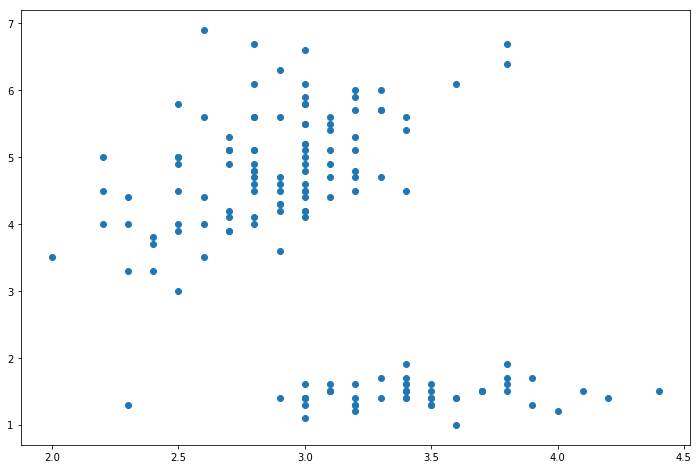

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(x=prueba[:,1],y=prueba[:,2],label='True position')
plt.show()

In [58]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt

In [61]:
data = X.columns.values.tolist()[0:] #otra forma de separar los datos 
dist_e = distance_matrix(iris[data],iris[data],p=1) #distancia euclidea
dist_man=distance_matrix(iris[data],iris[data],p=2) #manhattdan d

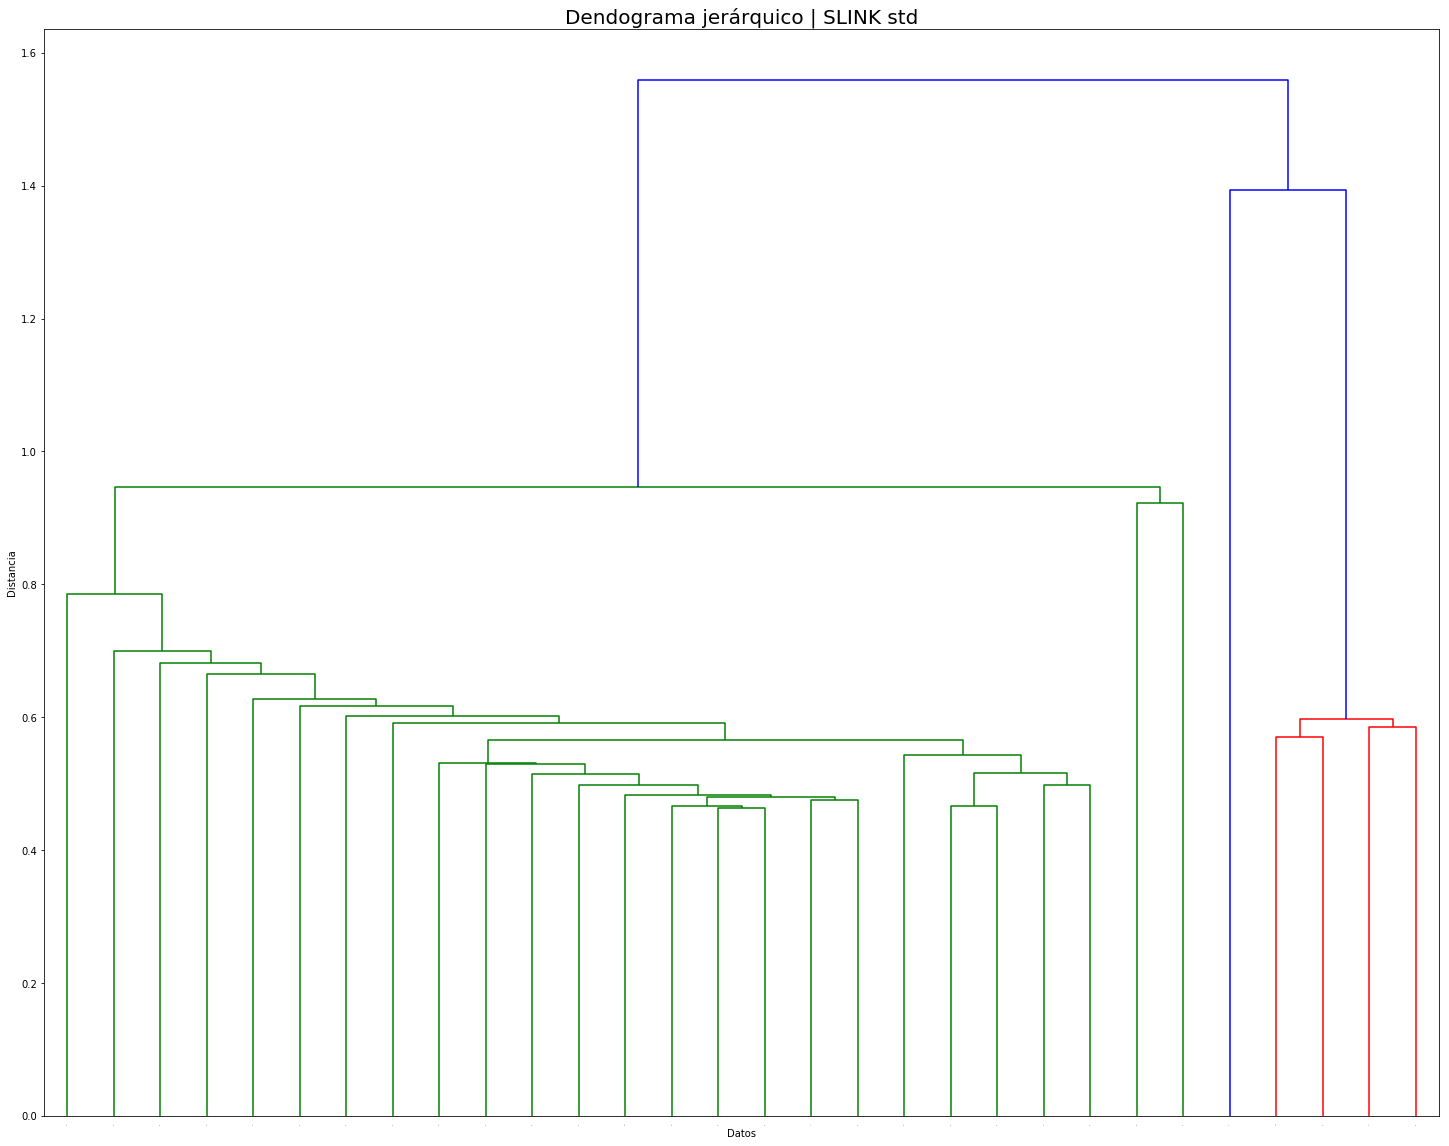

In [92]:
data_std = sc.fit_transform(iris[data])
Z_std = linkage(data_std,method='single')
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111)
ax.set_title('Dendograma jerárquico | SLINK std', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xlabel('Datos')
plt.ylabel('Distancia')
dendrogram(Z_std,leaf_rotation=90.,leaf_font_size=0.8,truncate_mode='lastp')
plt.show()

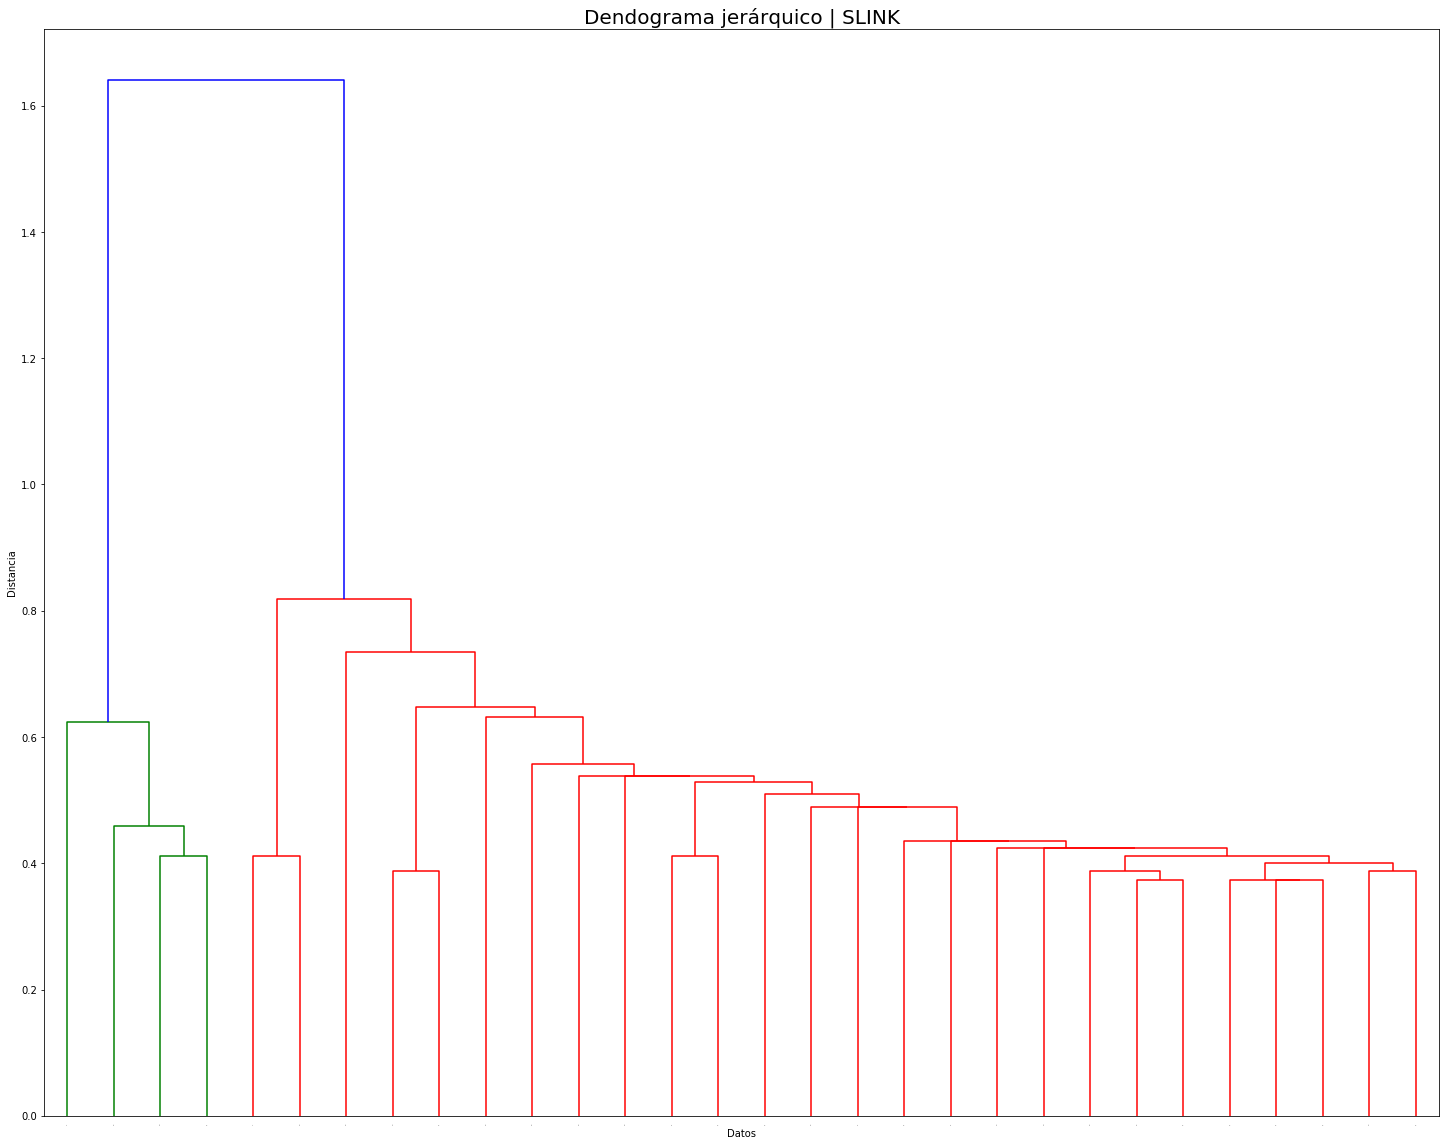

In [93]:
Z = linkage(iris[data],method='single')
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111)
ax.set_title('Dendograma jerárquico | SLINK', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xlabel('Datos')
plt.ylabel('Distancia')
dendrogram(Z,leaf_rotation=90.,leaf_font_size=0.8,truncate_mode='lastp')
plt.show()

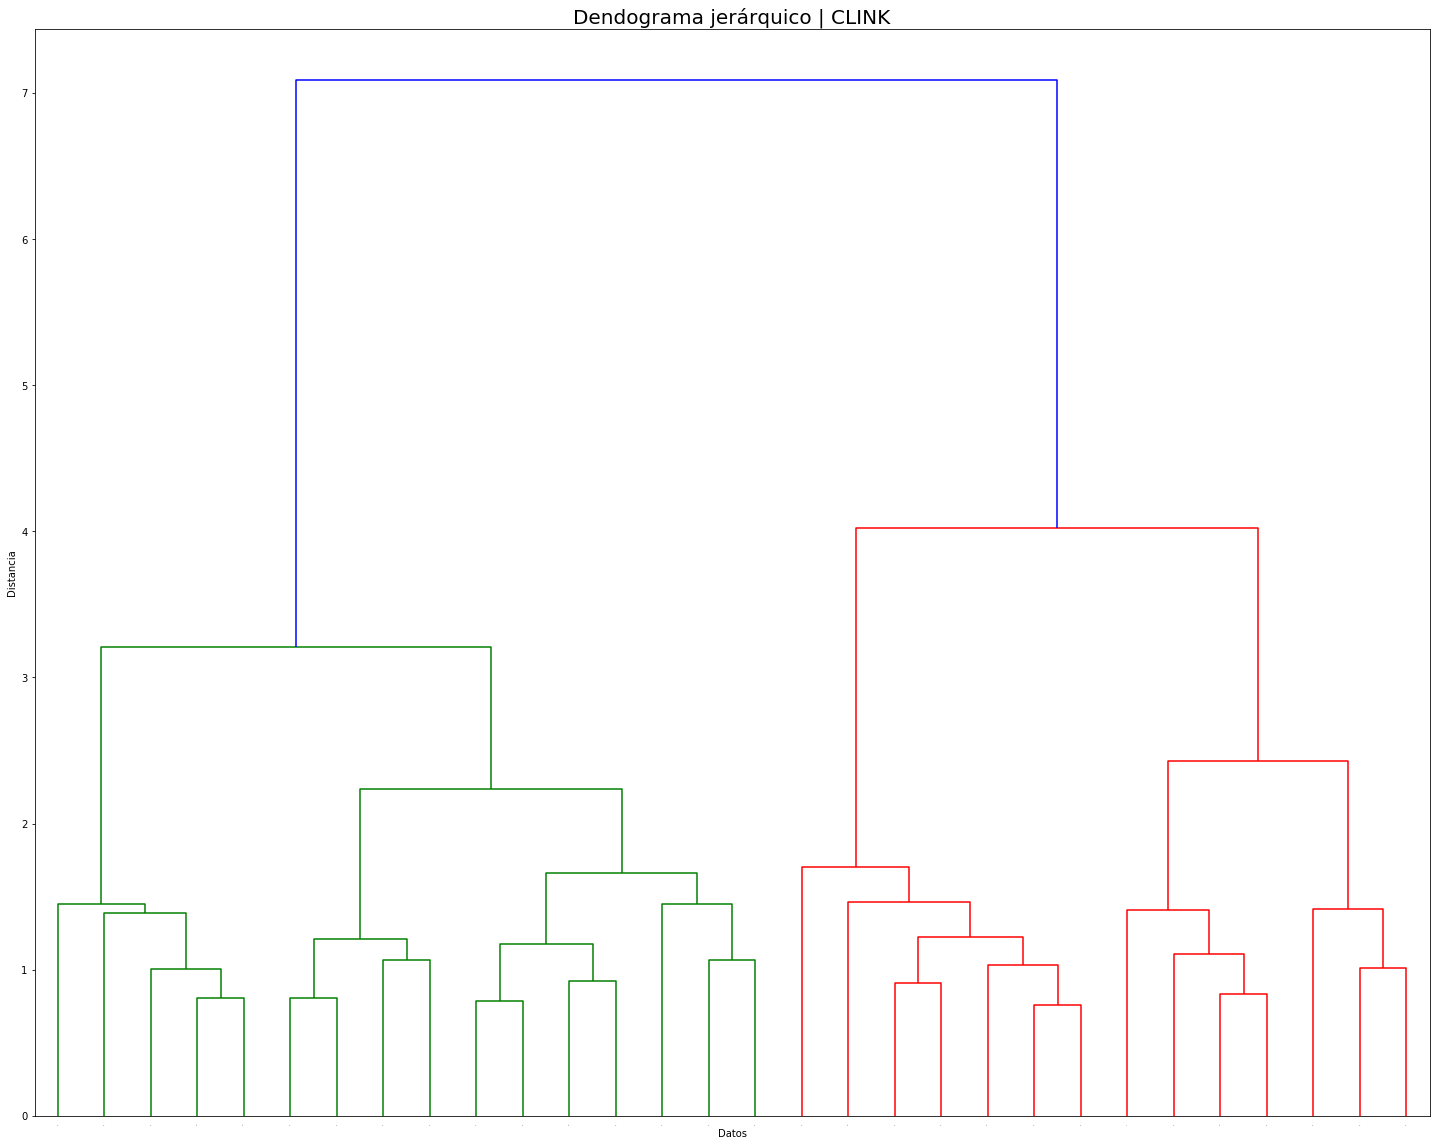

In [94]:
Z = linkage(iris[data],method='complete')
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111)
ax.set_title('Dendograma jerárquico | CLINK', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xlabel('Datos')
plt.ylabel('Distancia')
dendrogram(Z,leaf_rotation=90.,leaf_font_size=0.8,truncate_mode='lastp')
plt.show()

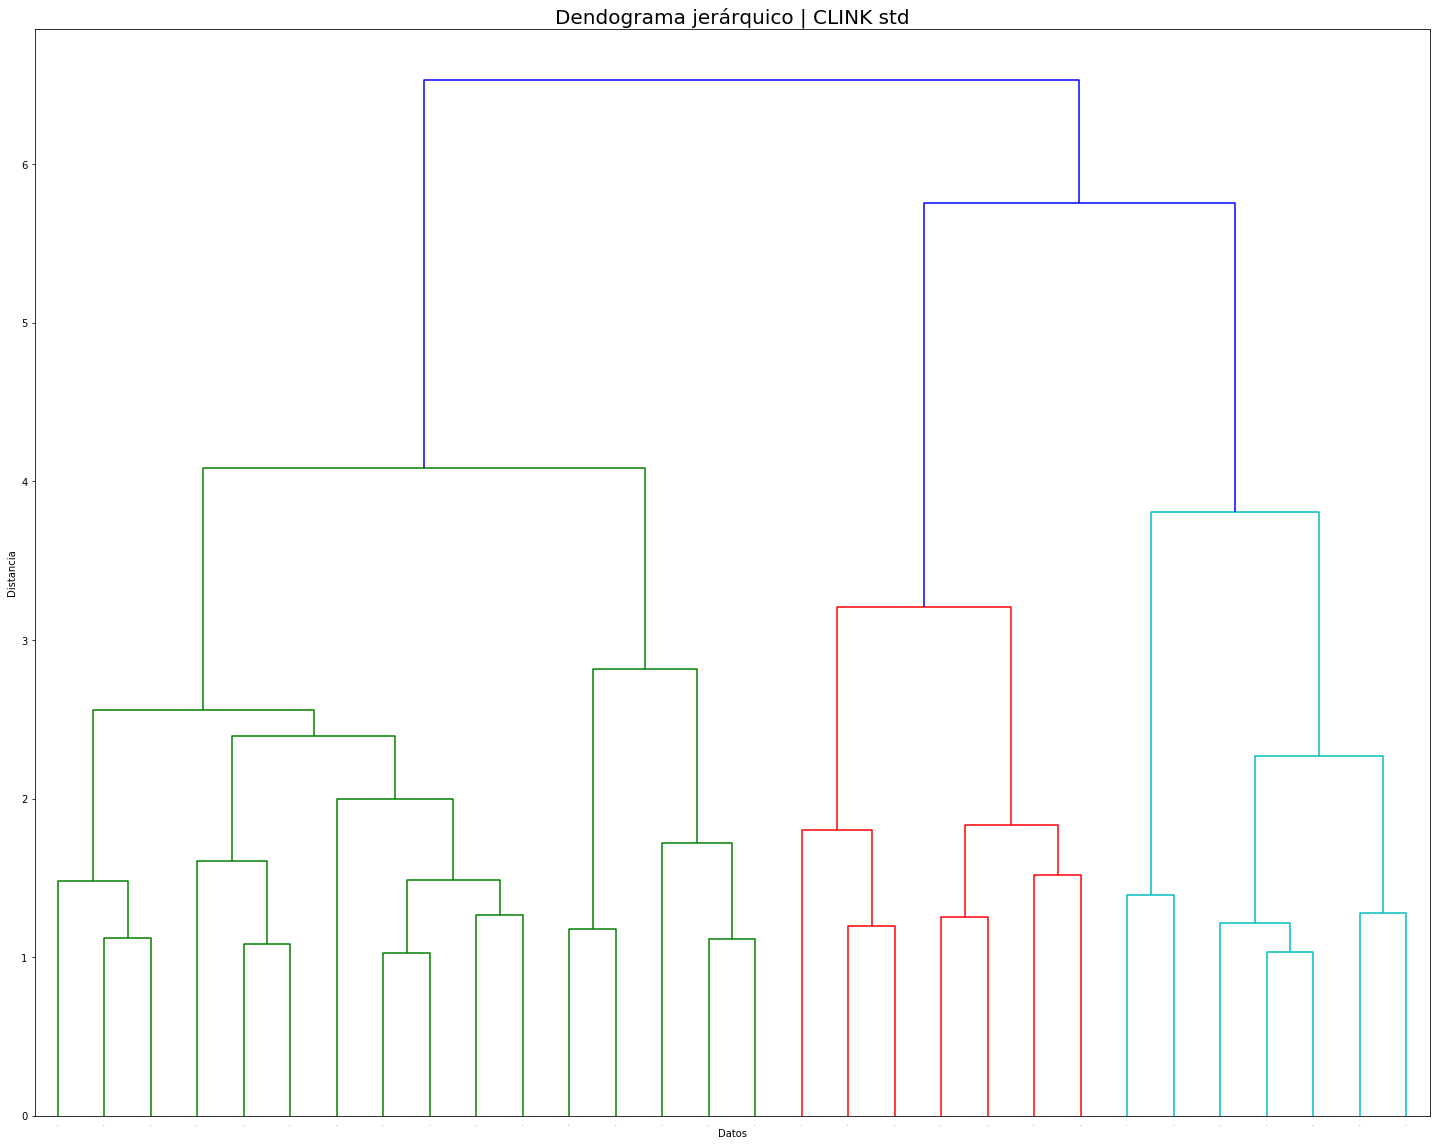

In [95]:
Z_std = linkage(data_std,method='complete')
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111)
ax.set_title('Dendograma jerárquico | CLINK std', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xlabel('Datos')
plt.ylabel('Distancia')
dendrogram(Z_std,leaf_rotation=90.,leaf_font_size=0.8,truncate_mode='lastp')
plt.show()

In [96]:
#predecir los cluster a los que pertenece la data
from sklearn.cluster import AgglomerativeClustering

In [127]:
def agg_to_csv(data,num_cluster,metrica,enlace):
    from sklearn.cluster import AgglomerativeClustering
    cluster = AgglomerativeClustering(n_clusters=num_cluster,affinity=metrica,linkage=enlace)
    c_predict= cluster.fit_predict(data)
    guardar1 = pd.DataFrame(data)
    guardar2 = pd.DataFrame(c_predict)
    guardar1.to_csv('../datasets/iris_plant/guardar1.csv',index=False)
    guardar2.to_csv('../datasets/iris_plant/guardar2.csv',index=False)

In [133]:
#agg_to_csv(data=iris[data],num_cluster=3,metrica='euclidean',enlace='ward') #enlace simple data no std
#agg_to_csv(data=data_std,num_cluster=3,metrica='euclidean',enlace='ward') #enlace simple data std
#agg_to_csv(data=iris[data],num_cluster=3,metrica='euclidean',enlace='complete') #enlace completo data no std
agg_to_csv(data=data_std,num_cluster=3,metrica='euclidean',enlace='complete') #enlace completo data std

In [125]:
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
cluster.fit_predict(iris[data])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

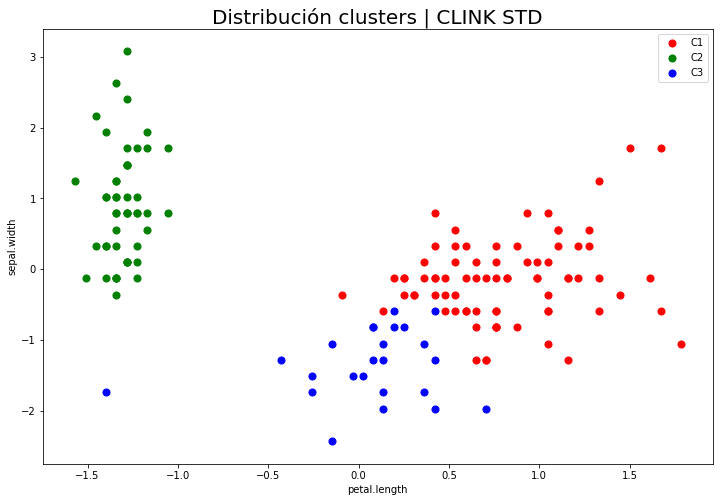

In [159]:
iris_clink = pd.read_csv('../datasets/iris_plant/CLINK_STD.csv')
c1 = iris_clink[iris_clink["cluster"]==0]
c2 = iris_clink[iris_clink["cluster"]==1]
c3 = iris_clink[iris_clink["cluster"]==2]
#caracteristicas menos correlacionadas 'sepal.width','petal.length'
fig2 = plt.figure()
fig2.set_size_inches(12,8)
ax = fig2.add_subplot(111)
ax.set_title('Distribución clusters | CLINK STD', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.scatter(y=c1['sepal.width'],x=c1['petal.length'],s=50,c='red',marker='o')
plt.scatter(y=c2['sepal.width'],x=c2['petal.length'],s=50,c='green',marker='o')
plt.scatter(y=c3['sepal.width'],x=c3['petal.length'],s=50,c='blue',marker='o')
plt.legend(['C1','C2','C3'],loc='best')
plt.ylabel('sepal.width')
plt.xlabel('petal.length')
plt.show()

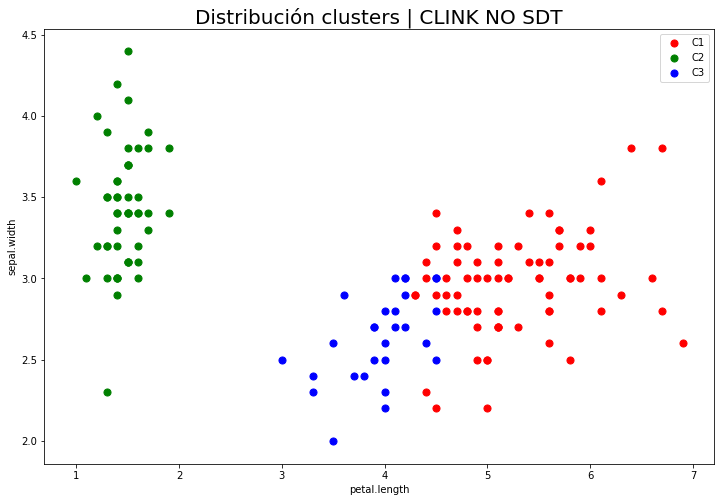

In [160]:
iris_clink = pd.read_csv('../datasets/iris_plant/CLINK_noSTD.csv')
c1 = iris_clink[iris_clink["cluster"]==0]
c2 = iris_clink[iris_clink["cluster"]==1]
c3 = iris_clink[iris_clink["cluster"]==2]
#caracteristicas menos correlacionadas 'sepal.width','petal.length'
fig2 = plt.figure()
fig2.set_size_inches(12,8)
ax = fig2.add_subplot(111)
ax.set_title('Distribución clusters | CLINK NO SDT', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.scatter(y=c1['sepal.width'],x=c1['petal.length'],s=50,c='red',marker='o')
plt.scatter(y=c2['sepal.width'],x=c2['petal.length'],s=50,c='green',marker='o')
plt.scatter(y=c3['sepal.width'],x=c3['petal.length'],s=50,c='blue',marker='o')
plt.legend(['C1','C2','C3'],loc='best')
plt.ylabel('sepal.width')
plt.xlabel('petal.length')
plt.show()

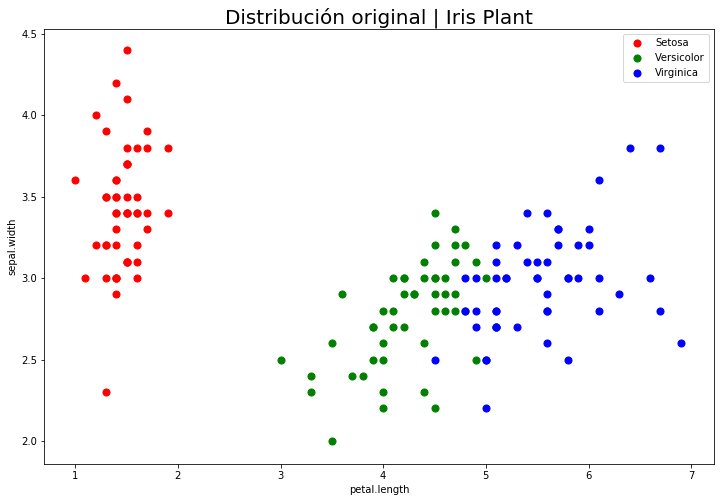

In [165]:
iris_clink = pd.read_csv('../datasets/iris_plant/iris_plant.csv')
c1 = iris_clink[iris_clink["variety"]=='Setosa']
c2 = iris_clink[iris_clink["variety"]=='Versicolor']
c3 = iris_clink[iris_clink["variety"]=='Virginica']
#caracteristicas menos correlacionadas 'sepal.width','petal.length'
fig2 = plt.figure()
fig2.set_size_inches(12,8)
ax = fig2.add_subplot(111)
ax.set_title('Distribución original | Iris Plant', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.scatter(x=c1['petal.length'],y=c1['sepal.width'],s=50,c='red',marker='o')
plt.scatter(x=c2['petal.length'],y=c2['sepal.width'],s=50,c='green',marker='o')
plt.scatter(x=c3['petal.length'],y=c3['sepal.width'],s=50,c='blue',marker='o')
plt.ylabel('sepal.width')
plt.xlabel('petal.length')
plt.legend(['Setosa','Versicolor','Virginica'],loc='best')
plt.show()

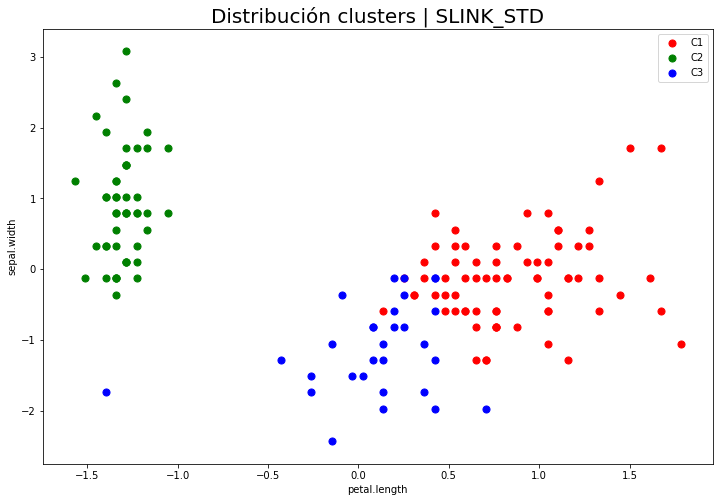

In [166]:
iris_clink = pd.read_csv('../datasets/iris_plant/SLINK_STD.csv')
c1 = iris_clink[iris_clink["cluster"]==0]
c2 = iris_clink[iris_clink["cluster"]==1]
c3 = iris_clink[iris_clink["cluster"]==2]
#caracteristicas menos correlacionadas 'sepal.width','petal.length'
fig2 = plt.figure()
fig2.set_size_inches(12,8)
ax = fig2.add_subplot(111)
ax.set_title('Distribución clusters | SLINK_STD', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.scatter(y=c1['sepal.width'],x=c1['petal.length'],s=50,c='red',marker='o')
plt.scatter(y=c2['sepal.width'],x=c2['petal.length'],s=50,c='green',marker='o')
plt.scatter(y=c3['sepal.width'],x=c3['petal.length'],s=50,c='blue',marker='o')
plt.legend(['C1','C2','C3'],loc='best')
plt.ylabel('sepal.width')
plt.xlabel('petal.length')
plt.show()

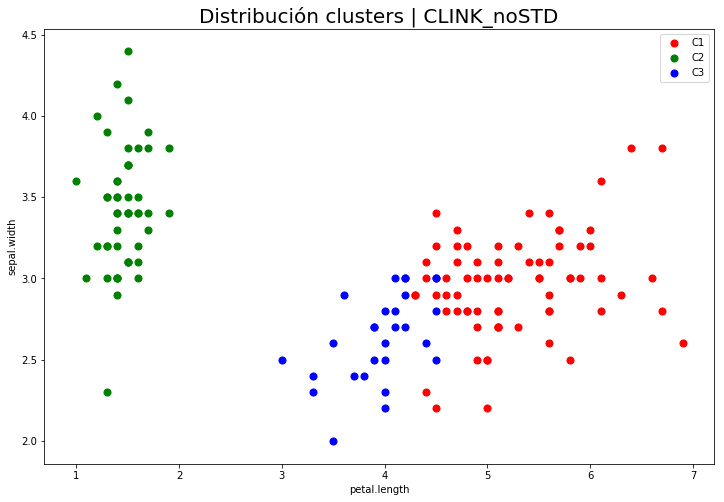

In [167]:
iris_clink = pd.read_csv('../datasets/iris_plant/CLINK_noSTD.csv')
c1 = iris_clink[iris_clink["cluster"]==0]
c2 = iris_clink[iris_clink["cluster"]==1]
c3 = iris_clink[iris_clink["cluster"]==2]
#caracteristicas menos correlacionadas 'sepal.width','petal.length'
fig2 = plt.figure()
fig2.set_size_inches(12,8)
ax = fig2.add_subplot(111)
ax.set_title('Distribución clusters | CLINK_noSTD', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.scatter(y=c1['sepal.width'],x=c1['petal.length'],s=50,c='red',marker='o')
plt.scatter(y=c2['sepal.width'],x=c2['petal.length'],s=50,c='green',marker='o')
plt.scatter(y=c3['sepal.width'],x=c3['petal.length'],s=50,c='blue',marker='o')
plt.legend(['C1','C2','C3'],loc='best')
plt.ylabel('sepal.width')
plt.xlabel('petal.length')
plt.show()